In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from PIL import Image
from glob import glob

In [3]:
# Load numpy zip
data = np.load('/Users/91830/FaceRecognition/data/data_10000_norm.npz')

In [4]:
X = data['arr_0'] # independent feature
y = data['arr_1'] # target value

In [5]:
X.shape, y.shape

((5462, 10000), (5462,))

### Eigen Image

In [6]:
X1 = X - X.mean(axis=0) #Subtracting all column with mean

In [7]:
from sklearn.decomposition import PCA

- Eigen values denote the variance
- Eigen vectors represent the direction

In [10]:
#large variance means large information is avilable in that perticular feature
pca = PCA(n_components=None,whiten=True,svd_solver='auto')

In [11]:
x_pca = pca.fit_transform(X1) 

In [12]:
x_pca.shape # Expected as a 10,000

(5462, 5462)

In [13]:
eigen_ratio = pca.explained_variance_ratio_
eigen_ratio_cum = np.cumsum(eigen_ratio)

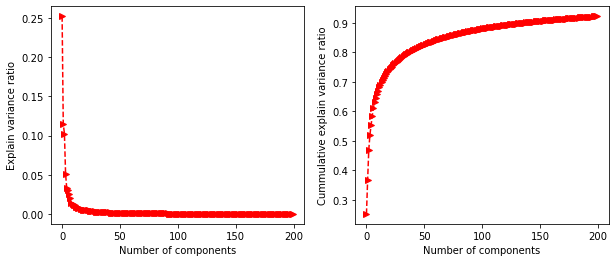

In [14]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1);plt.plot(eigen_ratio[:200],'r>--');
plt.xlabel("Number of components");
plt.ylabel("Explain variance ratio")
plt.subplot(1,2,2);plt.plot(eigen_ratio_cum[:200],'r>--')
plt.xlabel("Number of components");
plt.ylabel("Cummulative explain variance ratio")
plt.show()

Conclusion :Using Elbow method , consider number of components is between 25 -30 
    > since if I consider component between 25 to 30 the explained variance is around 75 %
    so, in order to get minimum 80% variance i am considering 50 components

In [15]:
pca_50 = PCA(n_components= 50,whiten=True,svd_solver='auto')
x_pca_50 = pca_50.fit_transform(X1)

In [16]:
# If you reduce the dimension by applying PCA it will known as eigen images
x_pca_50.shape

(5462, 50)

In [17]:
# Saving PCA
import pickle
pickle.dump(pca_50,open('/Users/91830/FaceRecognition/pca_50.pickle','wb'))

In [18]:
# Consider 50 component and inverse transform
x_pca_inv = pca_50.inverse_transform(x_pca_50)

In [19]:
# Here we consider only 50 components other are zero value
# 50 Components means we have identify 50 directions
x_pca_inv.shape

(5462, 10000)

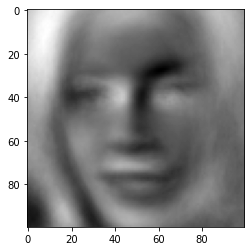

In [21]:
# Consider one image(i.e one row)
eig_img = x_pca_inv[0,:]
eig_img = eig_img.reshape((100,100))
plt.imshow(eig_img,cmap='gray')

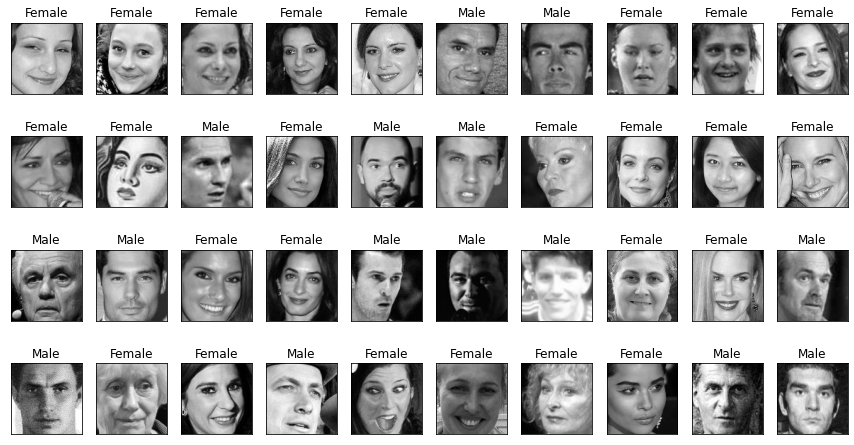

====================Eigen Images====================


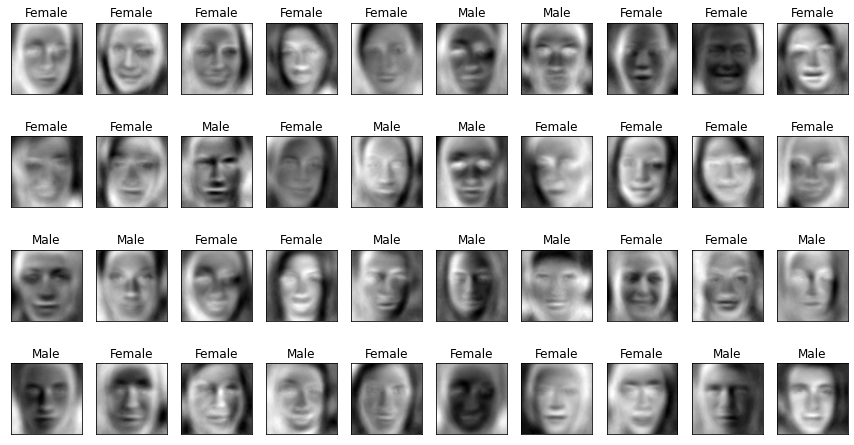

In [23]:
def label(y):
    if y==0:
        return 'Male'
    else:
        return 'Female'
    
np.random.randint(1001)
pics = np.random.randint(0,5451,40)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = X[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
plt.show()

print("="*20+'Eigen Images'+"="*20)
plt.figure(figsize=(15,8))
for i,pic in enumerate(pics):
    plt.subplot(4,10,i+1)
    img = x_pca_inv[pic:pic+1].reshape(100,100)
    plt.imshow(img,cmap='gray')
    plt.title('{}'.format(label(y[pic])))
    plt.xticks([])
    plt.yticks([])
    
plt.show()

Eigen Images considering important images and important features while doing that 
- we can reduce the number of direction and 
- we considering only important features

In [24]:
# Saving 
np.savez("/Users/91830/FaceRecognition/data/data_pca_50_y_mean.pickle",x_pca_50,y,X.mean(axis=0))